MADE BY: AAYOOSH SONI

SUBMITTED TO:¶
The Sparks Foundation: Data Science and Business Analytics Internship
TASK:3
 Exploratory Data Analysis - Retail


In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
supermarket = pd.read_csv("Downloads/SampleSuperstore.csv")

In [12]:
supermarket.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [14]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [13]:
supermarket.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [15]:
supermarket.shape

(9994, 13)

In [16]:
supermarket.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


<function matplotlib.pyplot.show(close=None, block=None)>

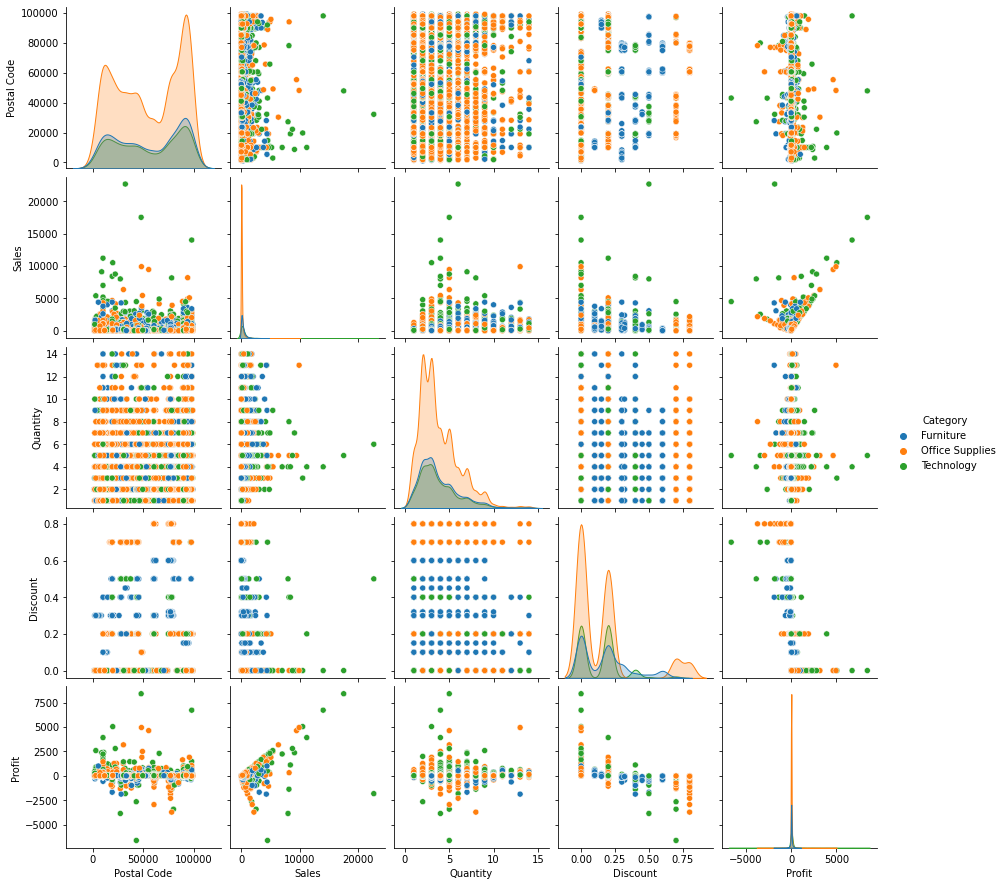

In [17]:
sns.pairplot(supermarket, hue='Category')
plt.show

<AxesSubplot:>

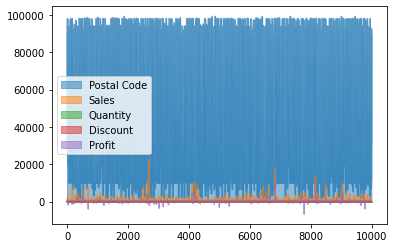

In [18]:
supermarket.plot.area(stacked=False)

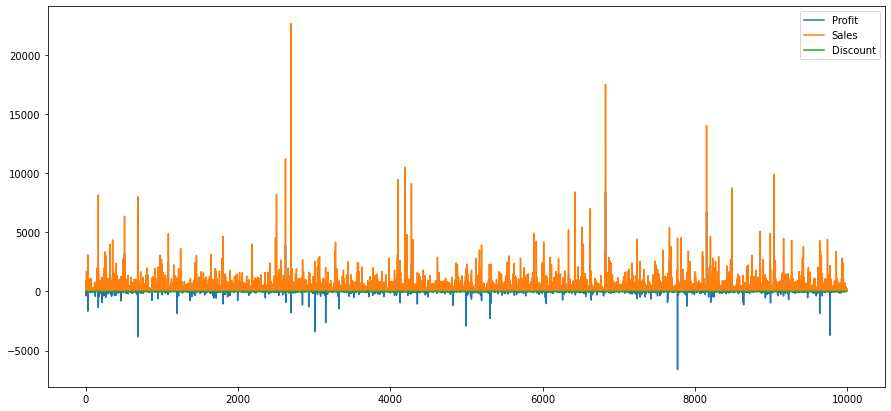

In [19]:
plt.figure(figsize=(15, 7))
plt.plot(supermarket.Profit)
plt.plot(supermarket.Sales)
plt.plot(supermarket.Discount)
plt.legend(["Profit", "Sales","Discount"], loc ="upper right") 

<AxesSubplot:ylabel='Segment'>

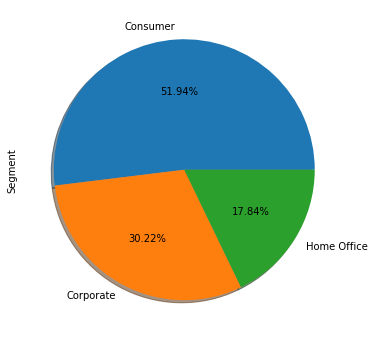

In [20]:
supermarket["Segment"].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True, figsize=(14, 6))

In [21]:
sps = supermarket.groupby("Segment")[["Sales", "Profit"]].agg(["sum"]).reset_index()
sps = sps.droplevel(1, axis = 1)
sps = sps.melt("Segment", var_name = "Business", value_name = "Sum")
sps

,Segment,Business,Sum
0,Consumer,Sales,1.161401e+06
1,Corporate,Sales,7.061464e+05
2,Home Office,Sales,4.296531e+05
3,Consumer,Profit,1.341192e+05
4,Corporate,Profit,9.197913e+04
5,Home Office,Profit,6.029868e+04


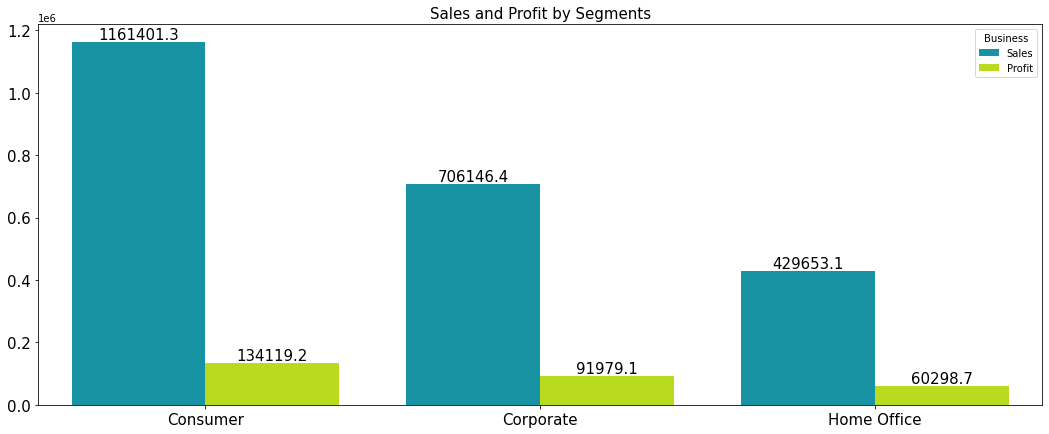

In [22]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Segment", y = "Sum", hue = "Business", data = sps, palette = "nipy_spectral")
for p in graph.patches:
        graph.annotate('{:.01f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Sales and Profit by Segments", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [23]:
posc = (supermarket["Sub-Category"].value_counts() / len(supermarket)) * 100
posc = posc.to_frame().reset_index()
posc.columns = ["Sub-Category", "Orders Percentage"]
posc

,Sub-Category,Orders Percentage
0,Binders,15.239143
1,Paper,13.708225
2,Furnishings,9.575745
3,Phones,8.895337
4,Storage,8.465079
5,Art,7.964779
6,Accessories,7.754653
7,Chairs,6.173704
8,Appliances,4.662798
9,Labels,3.642185


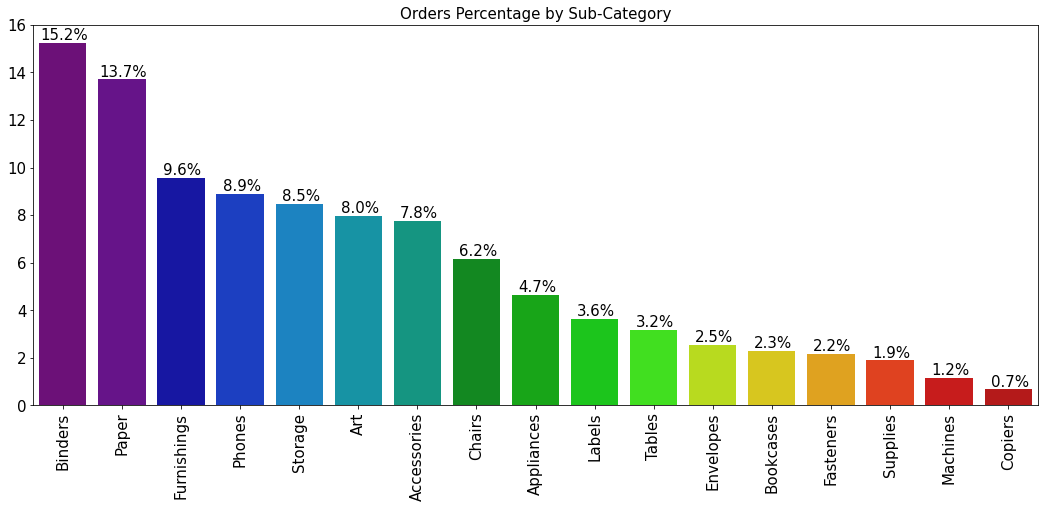

In [24]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Sub-Category", y = "Orders Percentage", data = posc, palette = "nipy_spectral")
for p in graph.patches:
        graph.annotate('{:.01f}%'.format(p.get_height()), 
                      (p.get_x()+0.425, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Orders Percentage by Sub-Category", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

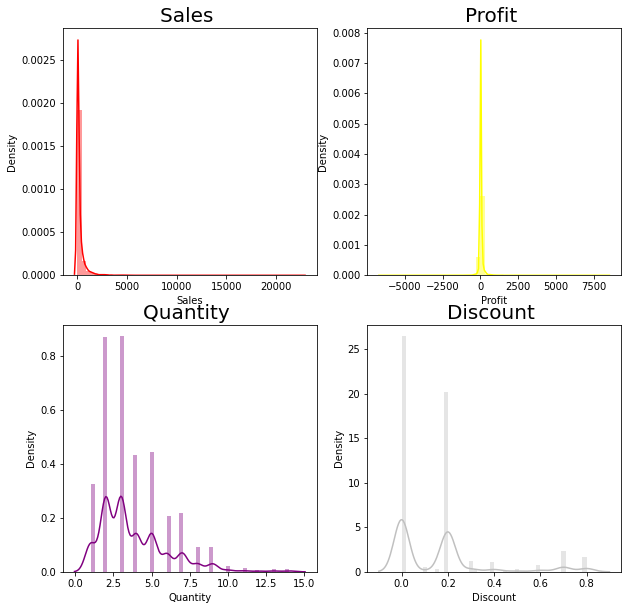

In [25]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (10,10))
sns.distplot(supermarket['Sales'], color = 'red',  ax = axs[0][0])
sns.distplot(supermarket['Profit'], color = 'yellow',  ax = axs[0][1])
sns.distplot(supermarket['Quantity'], color = 'purple',  ax = axs[1][0])
sns.distplot(supermarket['Discount'], color = 'silver',  ax = axs[1][1])
axs[0][0].set_title('Sales ', fontsize = 20)
axs[0][1].set_title('Profit ', fontsize = 20)
axs[1][0].set_title('Quantity ', fontsize = 20)
axs[1][1].set_title('Discount ', fontsize = 20)
plt.show()

In [27]:
sop = supermarket['City'].value_counts()
sop=sop.head(50)

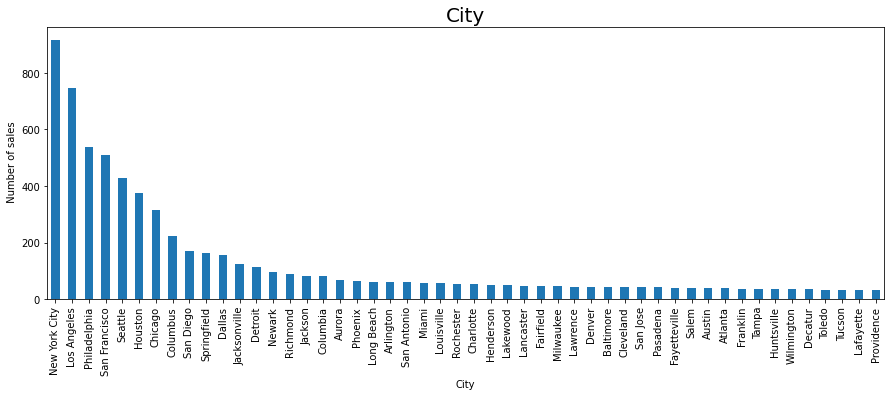

In [29]:
sop.plot(kind='bar',figsize=(15,5))
plt.ylabel(' Number of sales')
plt.xlabel('City')

plt.title('City', fontsize = 20)
plt.show()

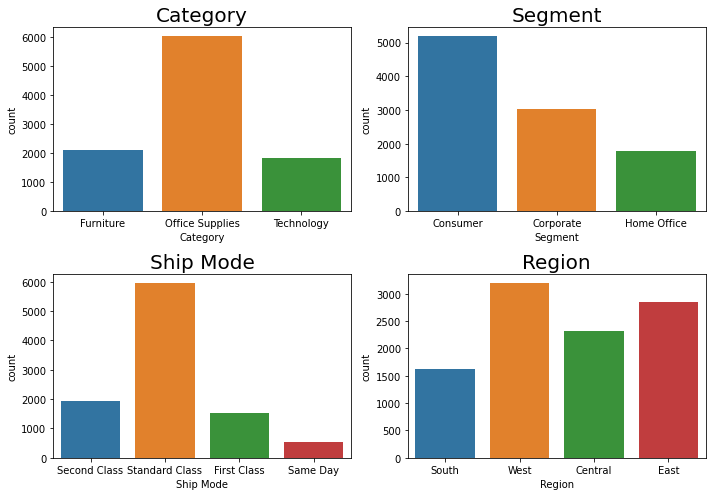

In [31]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,7));

sns.countplot(supermarket['Category'],ax=axs[0][0])
sns.countplot(supermarket['Segment'],ax=axs[0][1])
sns.countplot(supermarket['Ship Mode'],ax=axs[1][0])
sns.countplot(supermarket['Region'],ax=axs[1][1])
axs[0][0].set_title('Category',fontsize=20)
axs[0][1].set_title('Segment',fontsize=20)
axs[1][0].set_title('Ship Mode',fontsize=20)
axs[1][1].set_title('Region',fontsize=20)


plt.tight_layout()